# 21M.387 Fundamentals of Music Processing
## Problem Set 8: Audio Retrieval

Make sure all your answers and plots display when the code block is run. You can leave word-based answers in code comments or markdown cells.

You may use any fmplib functions from __previous__ units in your answers. You may __not__ use any fmplib functions from the current unit in your answers (unless explicitly noted). But you can use the current unit's fmplib for testing your code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact
import sys
sys.path.append("..")
import fmplib as fmp

plt.rcParams['figure.figsize'] = (14, 4)
plt.rcParams['image.interpolation'] = 'nearest'
fmp.documentation_button()

## Exercise 1

Write the function `make_constellation()` which returns a point constellation from the spectrogram of the input audio data.

Inputs:
- `snd`: the audio data
- `time_len`: $2 \tau$, the zone length _in seconds_ for the 2D peak detection
- `freq_len`: $2 \kappa$, the zone height _in Hertz_ for the 2D peak detection
- `plot`: optionally plot the spectrogram and points

Output:
- a $P \times 2$ matrix representing $P$ points where each row is $(n,k)$, coordinates of that point. Note that $n$ is on the time axis and $k$ is on the frequency axis.
 
Strategy:
- Create the magnitude spectrogram with parameters: $N = 2048, H = 256$. You can assume $F_s = 22050$.
- Only consider the frequency range $0-4000$Hz of the spectrogram. In other words, search only in a sub-range of rows of the spectrogram.
- To find peaks in the spectrogram, use the function `fmp.find_area_peaks()`. Note that this function will return points in the correct order $(x,y)$ as opposed to the matrix indexing convention of $(y,x)$.

This function is similar to `fmp.make_constellation`, but has different input arguments.

In [15]:
# unit8 class notes
def show_spec_and_points(spec, points, show_spec=True):
    if show_spec:
        fmp.plot_spectrogram(spec, cmap='Greys', colorbar=False)
    plt.plot(points[:,0], points[:,1], 'ro')
    plt.xlim(0, spec.shape[1])
    plt.ylim(0, spec.shape[0])
    plt.show()
    

def make_constellation(snd, time_len, freq_len, plot=False):
    fs = 22050
    fft_len = 2048
    hop_size = 256
    max_freq = 4000.
    max_bin = int(round(max_freq * fft_len / fs))

    spec = fmp.stft_mag(snd, fft_len, hop_size)[0:max_bin,:]
    points = fmp.find_area_peaks(spec, time_len, freq_len)
    
    if plot:
        show_spec_and_points(spec, points, show_spec=True)

    return points

Test your code on the first 10 seconds of _Magical Mystery Tour_ with parameters:
- $2 \tau = 0.5$ seconds
- $2 \kappa = 400$ Hz
- `plot = True`

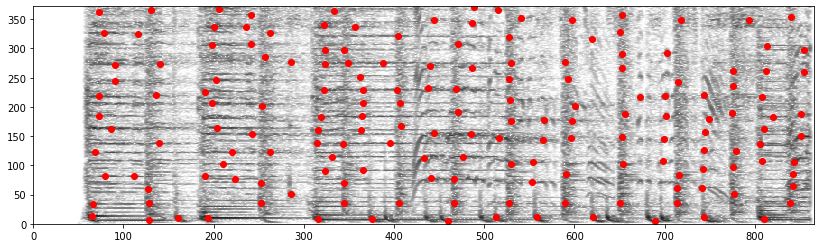

In [16]:
snd = fmp.load_wav("audio/beatles_magical_mystery_tour.wav", 0, 10)

# parameters
fs = 22050
fft_len = 2048
hop_size = 256

# test values
time_len = int(round(.5 * fs / hop_size))
freq_len = int(round(400. * fft_len / fs))

points = make_constellation(snd, time_len, freq_len, plot=True)

# # fmplib
# spec2 = fmp.stft_mag(snd, fft_len, hop_size)[0:max_bin,:]
# max_freq = 4000.
# max_bin = int(round(max_freq * fft_len / fs))
# points2 = fmp.make_constellation(snd, fft_len, hop_size, max_bin, time_len, freq_len)
# show_spec_and_points(spec2, points2, show_spec=True)
# print(points == points2)

## Exercise 2a

Assuming that a spectrogram has a fairly uniform distribution of bumps/contours (and no large areas without peaks), write the function `expected_points_in_song()` for the expected number of constellation points for a song given the input variables.

Inputs:
- `song_len`: song length (in seconds)
- `zone_time_len`: zone length (in seconds)
- `zone_freq_height`: zone height (in Hertz)
- `spec_range`: defines spectrogram frequency range to consider, from 0 to this (in Hertz)

Output:
- The number of constellation points expected for the whole song.

In [ ]:
def expected_points_in_song(song_len, zone_time_len, zone_freq_height, spec_range):
    pass

Show the results with the parameters of _Exercise 1_.


## Exercise 2b

Compare the results of your equation with the number of points actually generated by `make_constellation` for a few different zone sizes (modifying both width and height of the zones). 

What do you notice?  
Why do you think this happens?

## Exercise 3

The following two plots represent constellation maps for a Database $\mathcal{C(D)}$ and a Query $\mathcal{C(Q)}$.

<img src="data/ex_1a.png">
<img src="data/ex_1b.png">

Determine the matching function $\Delta_C[m]$ for $m \in [0,6]$ by shifting $\mathcal{C(Q)}$ over $\mathcal{C(D)}$.

Answer:


## Exercise 4a

Determine the inverted lists (ie, hash lists) $L(h)$ for $\mathcal{C(D)}$ of _Exercise 3_ using the hash function: $h=k$.

Answer:


## Exercise 4b

Using the above hash lists representing the database, compute the matching function  $\Delta_C[m]$ for $m \in [0,8]$ using the indicator function method:
- For each point $(n,k)$ in the query (where $h=k$), compute the shift amount $m = l - n$ for each $l \in L(h)$ of the database.
- Show your work (ie, list out all the calculated values of $m$)
- Finally, create the matching function $\Delta_C[m]$ by totaling the number of occurrences of each $m$.


Answer:


## Exercise 5

Write the function `items_to_db()` which converts a list of constellation points (the items) into a dictionary of inverted lists.

Inputs:
- `items`: a list of items where each item is a point $(n,h)$. $n$ is the item's location and $h$ is the hash value. Items may also be a numpy array arranged as a $2 \times P$ matrix of $P$ points.

Output:
- A python dictionary where the keys are the various values of $h$ and the value of each key is a python list of the locations $n$.

If a hash key is not present in the points list, it should not have an entry in the dictionary.


In [ ]:
def items_to_db(items):
    pass

Test your code with the entire song _Magical Mystery Tour_ as the database. 

- Create the constellation points (items) using zone parameters $2 \tau = 0.5, 2 \kappa = 400$.
- Create the inverted lists dictionary (as `ex5_db`)
- Find and print the total number of items (as `ex5_num_items`), the total number of lists (as `ex5_num_lists`), and the average number of items per list (as `ex5_ave_items_per_list`) for this example.

In [ ]:
# database audio
db_audio = fmp.load_wav("audio/beatles_magical_mystery_tour.wav")

ex5_db = ...
ex5_num_items = ...
ex5_num_lists = ...
ex5_ave_items_per_list = ...

## Exercise 6

Write the function `hash_match(db, query)` which finds the best shift amount that aligns the query points with the database points.

Inputs:
- `db`: a dictionary representing the hash-based inverted lists of the database
- `query`: a list of query points where each point is $(n,h)$. For this exercise, $h=k$ (the hash value of the point is the same as the frequency bin).

Outputs:
- location: the highest scoring shift amount for the query
- score: the number of point intersections at this location

Strategy:
- Use the matching algorithm as you did by hand in Exercise 4b. 
- Hint: `np.unique()` might be useful.

In [ ]:
def hash_match(db, query):
    pass

Test your code with the hash database of Exercise 5, and a query of the same song, 5 seconds long, starting at 40 seconds (with the same zone parameters).

- Make the query (as `ex6_query`)
- Use `hash_match()` to return the best matching location and score (setting `ex6_match_location` and `ex6_match_score`)

In [ ]:
# query
query_audio = fmp.load_wav("audio/beatles_magical_mystery_tour.wav", 40, 45)

ex6_query = ...
ex6_match_location = ...
ex6_match_score = ...

Now, showing your work in python:
- Convert the matching location to a value in seconds (setting `ex6_match_seconds`).
- How does this time value compare to the query location?
- What fraction of the query points matched the database (setting `ex6_match_fraction`)?
- Why is this match fraction not that high?

In [ ]:
ex6_match_seconds = ...
ex6_match_fraction = ...

## Exercise 7

Write the function `points_to_triplet_hash(points)` which creates the more interesting hashing scheme. As described in the book and lecture, instead of an item being just one constellation point, an item is calculated from a pair of points: an anchor point, and a fanout point. This function will be used to create this list of items from a  list of constellation points.

Inputs:
- `points`: a $P \times 2$ matrix of points where each row is a point $(n,k)$.

Output:
-  A list of items, where each item is $(n, h)$. $n$ is the item's location, and $h$ is its hash, a tuple of three values, as described below.

Strategy:
- Iterate through all input points.
- For each point $(n_0, k_0)$ (the anchor point), find all other points that fall within the fanout zone. These are all points $(n_1, k_1)$ that satisfy the conditions:
 - $n_0 < n_1 < n_0 + n_z$
 - $k_0 - k_z < k_1 < k_0 + k_z$
 - Use the $n_z = 100$ and $k_z = 30$
- An item is a pair of points $(n_0, k_0)$ and $(n_1, k_1)$. To encode the hash value ($h$) of an item, create a python tuple $(k_0, k_1, n_1 - n_0)$. Note that previously, $h$ was a single number. Now $h$ is a tuple.

In [ ]:
def points_to_triplet_hash(points):
    pass

Use this new hashing scheme to create a triplet-hash database and a triplet-hash query using the same song as above. 

- You should be able to create the database using `items_to_db()` from Exercise 5.
- You should also be able to run the query using `hash_match()` from Exercise 6.
- As you did before, set the variables below:
    - `ex7_db`: the inverted list database of the triplet-hash items
    - `ex7_query`: the triplet-hash query
    - `ex7_match_location`: the match location
    - `ex7_match_score`: the match score
    - `ex7_match_seconds`: the time of the location in seconds
    - `ex7_match_fraction`: the fraction of the query points that match the database at the location.

Verify that you get the same resulting location for this match. If your functions `items_to_db()` and `hash_match()` do not work in this Exercise, you should revisit them above.

In [ ]:
ex7_db = ...
ex7_query = ...
ex7_match_location = ...
ex7_match_score = ...
ex7_match_seconds = ...
ex7_match_fraction = ...

## Exercise 8

Here you will compare the two different hashing methods. 

First, find and print the total number of items of the database of Exercise 7 (as `ex8_num_items`), the total number of lists (as `ex8_num_lists`), and the average number of items per list (as `ex8_ave_items_per_list`)

In [ ]:
ex8_num_items = ...
ex8_num_lists = ...
ex8_ave_items_per_list = ...

The number of operations required to perform a query is roughly proportional to $M \cdot N \over L$ where $M$ is the number of items in the query and $N \over L$ is the average number of items per list in the database.

Calculate and compare the query times for the first and second hashing methods using the example databases and queries above. What do you find?

## Exercise 9

In this Exercise, we will explore audio matching. For simplicity, we will create a database of one song, though in general, the database is a concatenation of many songs.

The function `dtw_match()` below calculates accumulated cost and backtracking matrices for a query against database by running a variant of dynamic time warping, but removes any penalty for starting a path in the first row of the cost matrix.

Inputs:
- `C`: $\mathbf{C}$, the $N \times M$ cost matrix that compares a query (length $N$) to a database (length $M$)

Outputs:
- A tuple of $\mathbf{D}$, the accumulated cost matrix, and $\mathbf{B}$, the backtracking matrix, where each cell is an index into the tuple `DTW_STEPS`


In [ ]:
DTW_STEPS = ((1,0), (0,1), (1,1))

def dtw_match(C):
    """Dynamic time warping for audio matching. Assumes a cost matrix of N X M 
    where N is length of a query and M is the length of the database. Create 
    accumulated cost matrix and backtracking matrix with no penalty for starting
    anywhere along C[0,:]. Use step sizes (1,0), (1,0), and (1,1).
    
    :param C: the cost matrix

    :returns: (D, B), where D is the accumulated cost matrix and B is backtracking matrix
    """

    N, M = C.shape

    # accumulated cost matrix D:
    D = np.zeros(C.shape)

    # backtracking matrix B, set up as indices into DTW_STEPS
    B = np.zeros(C.shape, dtype=int)

    # [0,0] initial value
    D[0,0] = C[0,0]

    # column 0 initial values
    for n in range(1,N):
        D[n,0] = C[n,0] + D[n-1,0]
    B[:,0] = 0 # step (1,0)

    # row 0 initial values
    D[0,0:M] = C[0,:]
    B[0,:] = 1 # step (0,1)

    # compute accumulated cost, and keep track of steps
    for m in range(1,M):
        for n in range(1,N):
            # find minimal cost to reach (n,m). Accumulate into D. Remember step in B
            # these locations much match the DTW_STEPS line above
            acc_costs = D[n-1,m] + C[n,m], D[n,m-1] + C[n,m], D[n-1,m-1] + C[n,m]
            best_idx = np.argmin(acc_costs)

            D[n,m] = acc_costs[best_idx]
            B[n,m] = best_idx

    return D, B

- Create a CENS chromagram of Mozart's string quartet _Eine Kleine Nacht Music_ (the Database) with the parameters:
    - fft size $N = 4096$
    - hop size $H = 2048$
    - CENS filter length $= 11$
    - CENS downsample rate $= 3$
    - Remember to use `fmp.make_chromagram()` without log compression.
- Create a Query using the same parameters as above (the query is a piano recording)
- Create the cost matrix that compares Query and Database.
- Use `dtw_match()` to find $\mathbf{D}$ and $\mathbf{B}$, the accumulated cost matrix and the backtracking matrix (setting `ex9_D` and `ex9_B`).
- Create the matching function $\Delta_{\text{DTW}}[m]$ from $\mathbf{D}$ (as `ex9_ddtw`). Then plot it.

In [ ]:
db_audio = fmp.load_wav("audio/mozart_eine_kleine1.wav")
query_audio = fmp.load_wav("audio/mozart_query.wav")
fs = 22050.

display(ipd.Audio(db_audio, rate = fs))
display(ipd.Audio(query_audio, rate = fs))

In [ ]:

ex9_D = ...
ex9_B = ...
ex9_ddtw = ...

## Exercise 10

Write the function `get_match_regions(ddtw, B, num_matches)` that returns a list of matching regions calculated from the results of dynamic time warping.

Inputs:
- `ddtw`: $\Delta_{\text{DTW}}[m]$, the matching function 
- `B`: $\mathbf{B}$, the backtracking matrix
- `num_matches`: the desired number of matches to return

Output:
- a list of matches, where each match is a tuple of the start location, end location, and path cost

Strategy:
- Find the top $n$ minima locations of $\Delta_{\text{DTW}}[m]$ (lowest accumulated cost), which represent the endpoint of a matching path. Use `fmp.find_top_n_peaks()`, but remember that this function returns a signal's peaks (high points). For a window length, use the length of the query.
- For each endpoint, find the starting point by using the backtracking technique of dynamic time warping. Each cell of $\mathbf{B}$ is an index (0, 1, or 2) into the `DTW_STEPS` array.

In [ ]:
def get_match_regions(ddtw, B, num_matches):
    pass

- Call this function looking for 2 matches.
- Play these matches using `ipd.Audio()`. You should hear the same music in the piano query.